ウィルス分布のデータを作成する

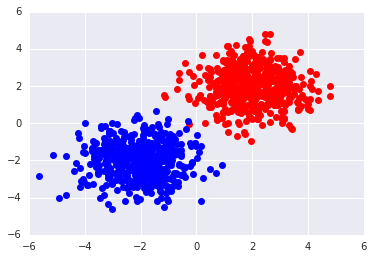

In [261]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_positive = np.random.randn(500, 1) + 2
y_positive = np.random.randn(500, 1) + 2
x_negative = np.random.randn(500, 1) - 2
y_negative = np.random.randn(500, 1) - 2

plt.figure(1)
plt.plot(x_positive, y_positive, 'ro', label='Data1')
plt.plot(x_negative, y_negative, 'bo', label='Data2')

感染、非感染のx,y座標を1つのデータに結合する

In [262]:
N = len(x_positive)
POSITIVE = np.zeros((N,2))
for i in xrange(N):
  POSITIVE[i][0] = x_positive[i]
  POSITIVE[i][1] = y_positive[i]

NEGATIVE = np.zeros((N,2))
for i in xrange(N):
  NEGATIVE[i][0] = x_negative[i]
  NEGATIVE[i][1] = y_negative[i]

VIRUS = np.vstack([NEGATIVE, POSITIVE]).astype(np.float32)

print VIRUS

[[-3.09615922 -2.41658235]
 [-0.6164875  -0.54644513]
 [-1.75742865 -2.72326517]
 ..., 
 [ 3.17863059  1.03621066]
 [ 2.18840432  2.13501024]
 [-0.27859455 -0.04467093]]


各データにラベル付けをする。ウィルス感染のラベルが[0,1], ウイルス非感染のラベルが[1,0]

In [263]:
STATE = np.zeros((N*2,2), dtype=np.float32)
for i in xrange(N*2):
  if i < N:
    STATE[i][0] = 1
  else:
    STATE[i][1] = 1

print STATE

[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]


それでは、ここからTensorFlowで結果を求める

In [305]:
tf.reset_default_graph()
LOGDIR = "./data"

with tf.Graph().as_default():
  
  X = tf.placeholder(tf.float32, shape=(None,2), name="input")
  y = tf.placeholder(tf.float32, shape=(None,2), name="output")
  W = tf.Variable(tf.random_normal([2,2], stddev=0.01), dtype=tf.float32, name="weight")
  b = tf.Variable(tf.random_normal([2], stddev=0.01), dtype=tf.float32, name="bias")
  print W
  print b

Tensor("weight/read:0", shape=(2, 2), dtype=float32)
Tensor("bias/read:0", shape=(2,), dtype=float32)


ロジスティック回帰のモデルを定義する

In [306]:
  with tf.name_scope('forward'):
    y_pred = tf.nn.softmax(tf.matmul(X,W) + b, name="forward")
    
    print y_pred
    print STATE
    print y

Tensor("forward:0", shape=(?, 2), dtype=float32)
[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
Tensor("output:0", shape=(?, 2), dtype=float32)


コストの計算

In [307]:
  with tf.name_scope('cost'):
    loss = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=y_pred)
    print loss
    cost = tf.reduce_mean(loss, 0)
    print cost

Tensor("Reshape_2:0", shape=(?,), dtype=float32)
Tensor("Mean:0", shape=(), dtype=float32)


トレーニングの設定

In [327]:
  sess = tf.Session()
  init_op = tf.global_variables_initializer()
  sess.run(init_op)
    
  # トレーニング
  learning_rate = 0.01
  train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost, var_list=[W,b])

ValueError: Tensor("GradientDescent_7/learning_rate:0", shape=(), dtype=float32) must be from the same graph as Tensor("weight:0", shape=(2, 2), dtype=float32_ref).